### Neural Networks

For this **Lab** and **Assignment** we will be using Neural Networks on the Iris Data Set.

In [1]:
# Note: Rename this filename to Neural Networks.ipynb before grading

#install.packages("NeuralNetTools")

In [2]:
library(tidyverse)
library(neuralnet)
library(caret)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [3]:
library(NeuralNetTools)

Iris data contains 5 different columns. The first four columns are the characteristics of the flower and the last column contains the species. Thus there's `sepal length`, `sepal width`, `petal length`,`petal width` and the respective species of the iris flower over here. Thus in this case the only script and the only code that you need to run to actually be with the neural network model is the line `NN`.

-   `NN` is the variable that we give to the name of the model.

-   The first parameter that we need to fill in results (`Species`), which is the target and consequently the last column. You want to predict this with respect to everything else (represented by the period).

-   The second variable that you want to fit into the equation is the name of the data and in this case the name is `iris`.

-   The next parameter is the `hidden` , which pertain to how many hidden layers do you want to put in the middle of your neural network.

In [4]:
head(iris)

#(5 neurons in the first hidden layer and 3 in the second hidden layer). 
NN <- neuralnet(Species ~ ., iris, hidden = c(5,3))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


Now we visualize our Neural Network that gives us a rough over view of how our neural network performs.

In [5]:
plot(NN)

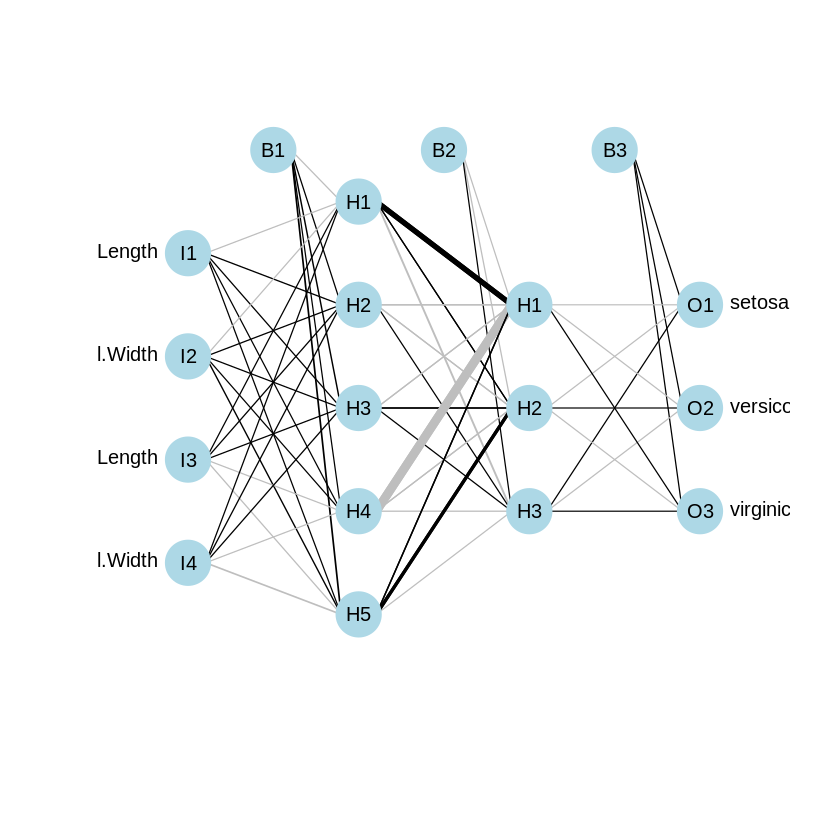

In [6]:
plotnet(NN)

Here we see a rough overview of how our neural network performs. All the numbers you observe in the plot that get propagated to all the hidden neurons. Therefore every single neuron will receive a number from every single input. Every single number in the input would get multiplied by a number called a weight.

Weight is the parameter within a [neural network](https://deepai.org/machine-learning-glossary-and-terms/neural-network) that transforms input data within the network's hidden layers. A neural network is a series of nodes, or [neurons](https://deepai.org/machine-learning-glossary-and-terms/neuron). Within each node is a set of inputs, weight, and a bias value. As an input enters the node, it gets multiplied by a weight value and the resulting output is either observed, or passed to the next layer in the neural network. Often the weights of a neural network are contained within the hidden layers of the network.

It is helpful to imagine a theoretical neural network to understand how weights work. Within a neural network there's an input layer, that takes the input signals and passes them to the next layer.

 Next, the neural network contains a series of hidden layers which apply transformations to the input data. It is within the nodes of the hidden layers that the weights are applied. For example, a single node may take the input data and multiply it by an assigned weight value, then add a bias before passing the data to the next layer. The final layer of the neural network is also known as the output layer. The output layer often tunes the inputs from the hidden layers to produces the desired numbers in a specified range.

Through a series of transformations to all of the networks we get 3 outputs and in this case it is the 3 species of flowers. All 3 outputs have their associated probabilities for each 3 species of flower and we have the probability of answers being `setosa` , `verscicolor` or `virginica`. Unlike Support Vector Machines that give you a list if outputs directly, Neural Networks outputs are a bit different. They do not give you the answer directly but the probability to the answer. Observe the following `pred` output below.

In [7]:
pred <- neuralnet::compute(NN, iris[, c(1,2,3,4)]) # Same as a prediction function in SVM. 
pred.2 <- data.frame()

You get a neuron and a `net result`. However the `net result` output is a bit complicated to understand hence the `pred.2` second variable option.

Looking at the `net result` output we have the nodes `[,1], [,2] , [,3]` which represents the first, second and third neuron.

From the first input nodes, the value closes to 1 will tell what the probability of the output is supposed to be. It could either be `setosa` , `versicolor` or `virginica`.

You can actually use the maximum number among the three and just put them into a different data frame, which is what we have done in the for loop below, hence the `pred.2` output. We have each number of column and their respective species (either 1,2,3).

In [8]:
for( i in 1:150){
  pred.2 <-rbind(pred.2, which.max(pred$net.result[i,]))
}   

# many functions you can use, you can run the activator as a sigmoid or you can run a linear function etc... 
# but in this case we just found the biggest probability as our answer. 

In [9]:
head(pred.2)

,X1L
,<int>
1,1
2,1
3,1
4,1
5,1
6,1


Since we know that 1 is for `setosa`, 2 is for `versicolor` and 3 is for `virginica`, we run a very simple substitution code to put the prediction from number to their respective names.

In [10]:
pred.2$X1L <- gsub(1, "setosa", pred.2$X1L)
pred.2$X1L <- gsub(2, "versicolor", pred.2$X1L)
pred.2$X1L <- gsub(3, "virginica", pred.2$X1L)

Now it is your turn to run a code line that will change the prediction into a factor, instead of a character data frame. Use the function `as.factor` to perform this task. Use the output variable `prediction`. Completion of this step completes your prediction model.

In [11]:
# Convert predictions to factor
predictions <- as.factor(pred.2$X1L)


In [12]:
predictions

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor versicolor versicolor versicolor virginica 
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  virginica 
[103] virginica  virginica  virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  virginica 
[121] virginica  virginica  virginica  virginica  virginica  virginica 
[127] virginica  virginica  virginica  virginica  virginica  virginica 
[133] virginica  virginica  virginica  virginica  virginica  virginica 
[139] virginica  virginica  virginica  virginica  virginica  virginica 
[145] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

Once you have completed the above step use the code below to run your `reference` model, which is the initial input that we have. We observe that there are 150 of them in a factor format and we compare it to our `prediction` output and you should observe that both `predictions` and `reference` should be very similar. 

In [13]:
# Create reference from original Species column in iris dataset
reference <- iris$Species

Using the `confusionMatrix` function, compare both the `predictions` and the `reference` to see how many you got correct from the neural network. Comment on your results! 

In [14]:
matrix <- confusionMatrix(reference,predictions)

matrix


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         49         1
  virginica       0          0        50

Overall Statistics
                                          
               Accuracy : 0.9933          
                 95% CI : (0.9634, 0.9998)
    No Information Rate : 0.34            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.99            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9804
Specificity                 1.0000            0.9901           1.0000
Pos Pred Value              1.0000            0.9800           1.0000
Neg Pred Value              1.0000            1.0000           0.9900
P